In [1]:
library(FactoMineR)
library(factoextra)
library(tidyverse)
library(dplyr)
library(cowplot)
library(tidyr)
library("ggExtra")
library(ggbeeswarm)
library(gghalves)


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [10]:
## load fup MCA results

fupMCA <- readRDS("fupMCA.RDS")

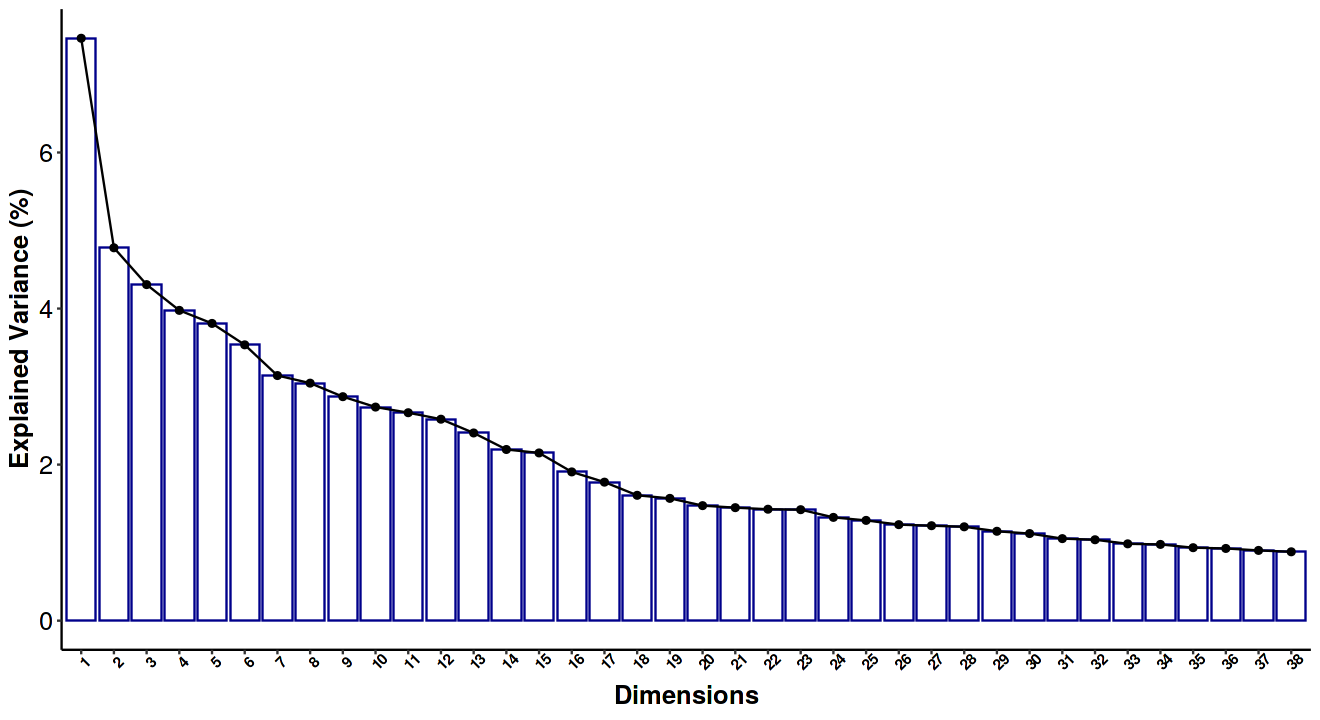

In [11]:
eigen <- get_eig(fupMCA)
eigen <-  data.frame(eigen)
eigen80 <- eigen[eigen$cumulative.variance.percent <= 81,]
# eigen80
options(repr.plot.width=11, repr.plot.height=6)

scree_pl <- fviz_screeplot(fupMCA, addlabels = FALSE,ncp=38,barfill="white", barcolor ="darkblue",
                           hjust = -0.3) +  ylab("Explained Variance (%)")+ theme_classic()
scree_pl <- scree_pl + 
theme(axis.text.x=element_text(size=, color="black", face="bold", angle=45),
     axis.text.y=element_text(size=15,color="black"),
     axis.title.x = element_text(size=15, face="bold"),
     axis.title.y = element_text(size=15, face="bold"),
     legend.title = element_text(size=9), 
      legend.text=element_text(size = 10),
     plot.title = element_blank())
scree_pl

In [12]:
### Extract the 38 dimensions to a data frame and save to file
dims <- get_mca_ind(fupMCA)
fup.mca38 <- (dims$coord[,1:38])
write.csv(fup.mca38,"fup_mca38.csv")

In [13]:
## mdata contain reassigned isolates

mdata = read.csv('../../Figures_codes/Figure2/CompleteDatabase.csv')
mdata
mdata <- mdata  %>%  column_to_rownames("Isolate")
mdata <-  merge(mdata,fup.mca38, by="row.names",all.y = TRUE)    %>% 
column_to_rownames("Row.names") %>% 
select(Date,Sequencing,AET,AETdiff, Patient)

## Create BAPS df for group split

baps = read.csv("../Figure2/hierBAPS.txt",row.names = 2)
baps <- baps[,-1]
baps
baps <-merge(baps,fup.mca38, by="row.names", all.y = TRUE)   %>% 
column_to_rownames("Row.names") %>% 
select(level.1,level.2)

X,Isolate,Date,Sequencing,AET,AETdiff,Patient
<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,PA6,18-Oct-11,Original,0,0,SK001
2,PA7,27-May-11,Original,1,1,SK002
3,PA8,27-May-11,Original,1,1,SK002
4,PA10,27-May-11,Original,1,1,SK002
5,PA14,27-May-11,Original,1,1,SK002
6,PA17,27-May-11,Original,1,1,SK002
7,PA19,27-May-11,Original,1,1,SK002
8,PA21,27-May-11,Original,1,1,SK002
9,PA23,27-May-11,Original,1,1,SK002


,level.1,level.2
,<int>,<int>
PA10,1,1
PA1012,2,3
PA1013,2,3
PA1014,2,3
PA1015,2,3
PA1019,3,6
PA1020,3,6
PA1021,3,7
PA1022,3,7


In [14]:
## Color palettes for plotting baps

library(RColorBrewer)
n <- 20
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
# pie(rep(1,n), col=sample(col_vector, n))
cols_baps <- c('#FF0000','#5B1A18','#F2AD00','#5BBCD6','#D8A499',
        '#ECCBAE','#046C9A','#D69C4E','#00A08A','#C6CDF7','#ABDDDE','#000000',
          '#F1BB7B','#FD6467','#D67236',
        '#E6A0C4','#7294D4','#F98400'
)

## Sort baps levels
baps$level.1 <- factor(baps$level.1, levels=as.character(c(1:17)), labels=as.character(c(1:17)))

In [22]:
dim12_aet <- fviz_mca_ind(fupMCA, 
             axes=c(1,2),
             label = "none", # hide individual labels
             habillage = as.factor(as.character(mdata$AET)),
                    addEllipses =FALSE,# color by groups 
             palette = c("#2506A2","#D40707"),
                          pointsize = 1.5,
             ggtheme = theme_bw())+
scale_color_manual(labels=c("Eradication","Failure"),values= c("#2506A2","#D40707"))+
            theme(
                 legend.text=element_text())+
                labs(title="",color="AET",fill="AET",values=c("E","F"))+
                theme(axis.text.x=element_text(size=10, color="black", angle=34,hjust=0.8),
     axis.text.y=element_text(size=10,color="black"),
     axis.title.x =  element_text(size=12, face="bold"),
     axis.title.y = element_text(size=12, face="bold"),
     legend.title = element_text(size=10), 
      legend.text=element_text(size = 9),
     plot.title = element_text(size = 15))+
scale_y_continuous(limits = c(-0.6, 0.8))
dim12_aet <- dim12_aet+ geom_rug(aes(color=factor(mdata$AET)))
dim12_aet<- dim12_aet+ggtitle('Individual samples colored by AET outcome')
dim12_baps <- fviz_mca_ind(fupMCA, 
             axes=c(1,2),
             label = "none", # hide individual labels
             habillage = baps$level.1,
                    addEllipses =FALSE,# color by groups 
             palette = cols_baps,
            pointsize = 1.5,
             ggtheme = theme_bw())+
                labs(title="",color="BAPS",fill="BAPS")+
                theme(axis.text.x=element_text(size=10, color="black", angle=34,hjust=0.8),
     axis.text.y=element_text(size=10,color="black"),
     axis.title.x =  element_text(size=12, face="bold"),
     axis.title.y = element_text(size=12, face="bold"),
     legend.title = element_text(size=10), 
      legend.text=element_text(size = 9),
     plot.title = element_text(size = 15))+
scale_y_continuous(limits = c(-0.6, 0.8))
dim12_baps_rug <- dim12_baps +   geom_rug(aes(color=baps$level.1)) 
dim12_baps_rug <- dim12_baps_rug+ggtitle('Individual samples colored by BAPS groups assignment')

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



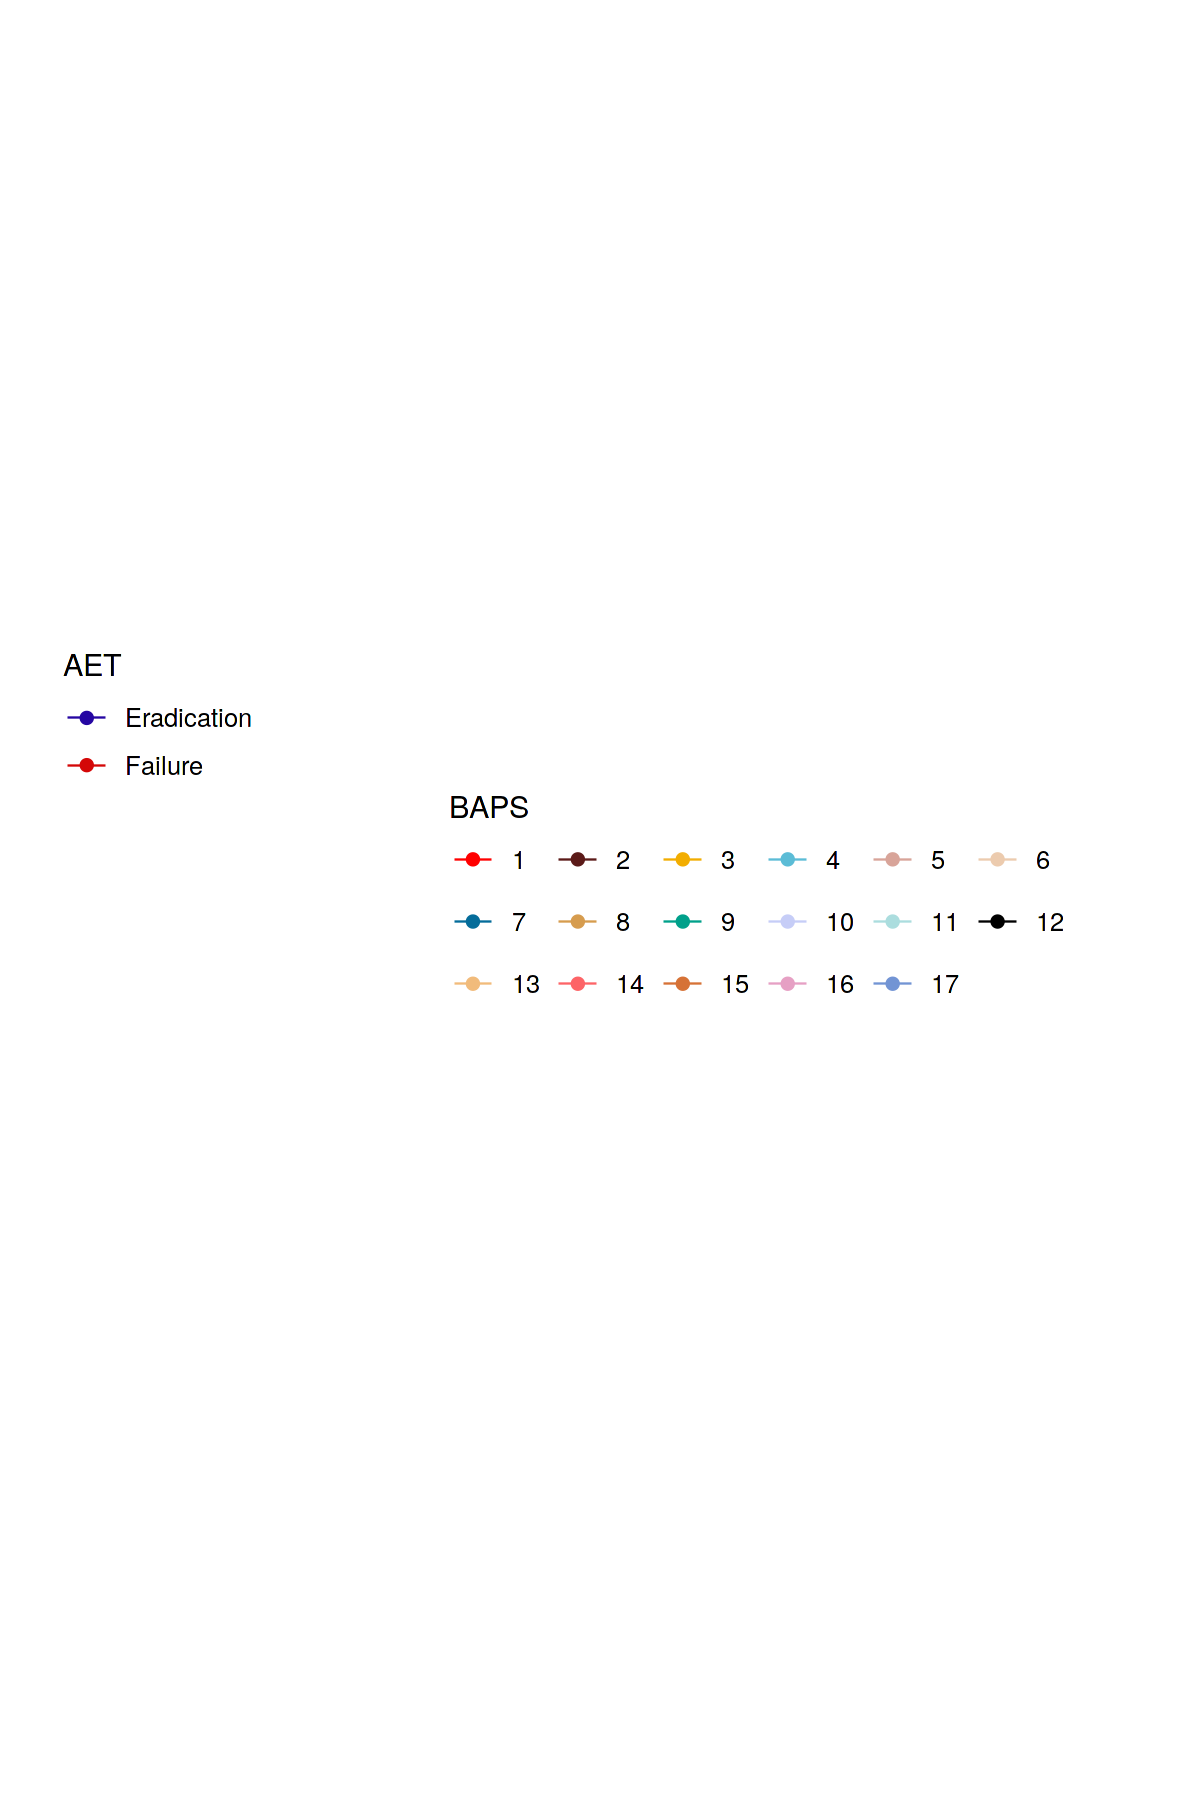

In [23]:
leg1.2 <- get_legend(
  # create some space to the left of the legend
  dim12_aet + theme(legend.box.margin = margin(0, 0, 0, 8),
                   legend.box = "horizontal",
                     legend.key.size = unit(1, 'cm'),
                    legend.title = element_text(size=18),
                   legend.text = element_text(size=15)))
leg2.2 <- get_legend(
  # create some space to the left of the legend
  dim12_baps_rug + theme(legend.box.margin = margin(0, 0, 0, 8),
                        legend.box = "horizontal",
                         legend.direction='vertical',
                         legend.key.size = unit(1, 'cm'),
                                   legend.title = element_text(size=18),
                        legend.text = element_text(size=15))+
guides(color=guide_legend(nrow=3,byrow=TRUE)))
# leg2.2



leg1.2.2 <- plot_grid(leg1.2,NULL,nrow=2,rel_heights = c(0.80,0.2))
legs2 <- plot_grid(leg1.2.2,leg2.2, ncol=2,rel_widths = c(0.25,0.75)) 
legs2

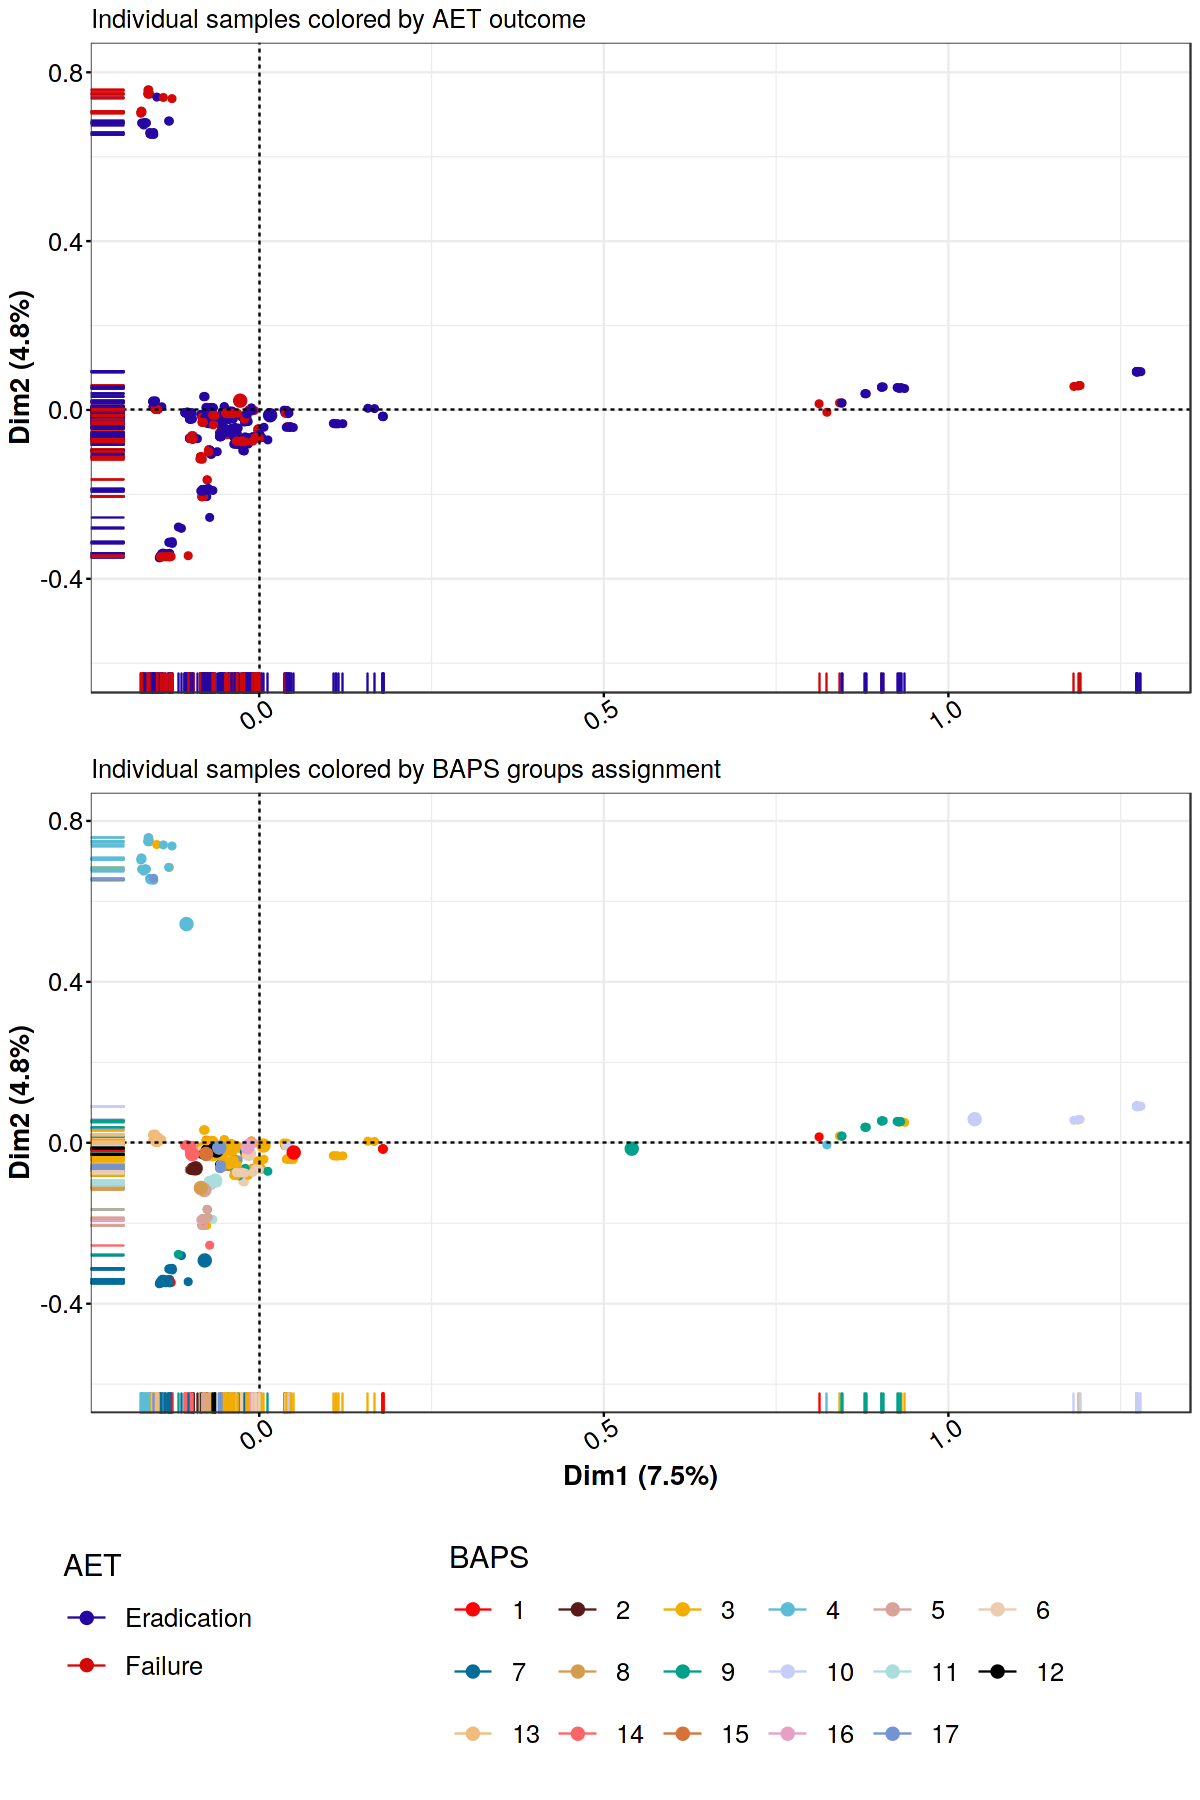

In [24]:

options(repr.plot.width=10, repr.plot.height=15)

inset2 <- plot_grid(dim12_aet+theme(axis.title.y = element_text(size=16),
                                    axis.title.x = element_blank(),
                                    axis.text.y = element_text(size=15),
                                    axis.text.x =  element_text(size=15),
                                    legend.position = 'none'),
                    dim12_baps_rug+theme(axis.title.y = element_text(size=16),
                                         axis.title.x = element_text(size=16),
                                         legend.position = 'none',
                                        axis.text.y = element_text(size=15),
                                    axis.text.x =  element_text(size=15)), ncol=1)
dim12 <- plot_grid(inset2,legs2, ncol = 1,rel_heights = c(1,0.2))
dim12


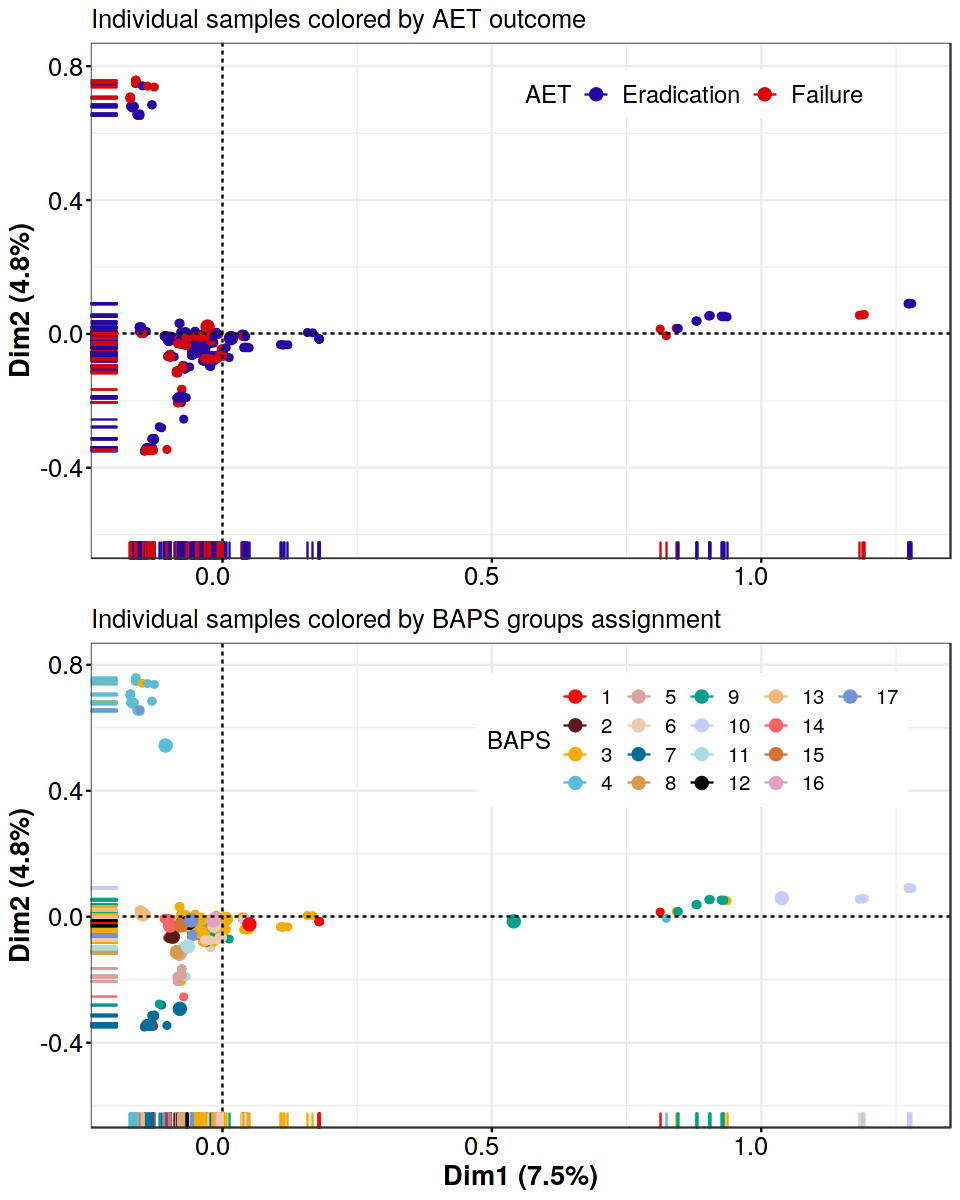

In [45]:
# inset2 <- 
options(repr.plot.width=8, repr.plot.height=10)

plot_grid(dim12_aet+theme(axis.title.y = element_text(size=16),
                                    axis.title.x = element_blank(),
                                    axis.text.y = element_text(size=15),
                                    axis.text.x =  element_text(size=15, angle = 0),
                                   legend.text=element_text(size=14),
                                         legend.title=element_text(size=14),
                                    legend.position = c(0.7,0.9),
                         legend.direction='horizontal'),
                    dim12_baps_rug+theme(axis.title.y = element_text(size=16),
                                         axis.title.x = element_text(size=16),
                                         legend.position = c(0.7,0.8),
                                         legend.direction='horizontal',
                                         legend.text=element_text(size=12),
                                         legend.title=element_text(size=14),
                                        axis.text.y = element_text(size=15),
                                    axis.text.x =  element_text(size=15,angle = 0)), ncol=1)

ggsave('Figure5.png',dpi = 400,device = 'png',width = 9, height = 12)
ggsave('Figure5.tif',dpi = 400,device = 'tiff',width = 9, height = 12)

# dim12 <- plot_grid(inset2,legs2, ncol = 1,rel_heights = c(1,0.2))
# dim12
